# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Isna Septi Wahyuni
- **Email:** m015b4kx2019@bangkit.academy
- **username Dicoding:** isnasepti18


## Menentukan Pertanyaan Bisnis

- What is the trend in the number of bike sharing in 2011-2012?
- When are the times when bicycle sharing are highest?
- How does the number of sharing compare between registered and unregistered users in 2011-2012?

## Import Semua Packages/Library yang Digunakan

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure
import seaborn as sns

## Data Wrangling

### Gathering Data

In [11]:
day_df=pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
hour_df= pd.read_csv('data/hour.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Gathering dataprocess show the 5th first line in dataset, both hour and day.
- After loading the datasets, it starts to look for trend opportunities that might increase. It seems from the difference count from every time, seasons, days, and total renters (registered or not) 

### Assessing Data

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [14]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
print('total duplicate: ', day_df.duplicated().sum())

total duplicate:  0


In [16]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [18]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [19]:
print('total duplicate: ', hour_df.duplicated().sum())

total duplicate:  0


In [20]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- From day dataset,there is no missing values in any variabel, it also prove by running isna() modul. The dataset also have neither duplicated value nor inaccurate value. Unfortuantely, on the dteday feature is using object datatype, which supposed to datetime datatype.
- From hour dataset,it's kinda similiar with the day dataset. It doesn't have any missing value, duplicated value, or inaccurate value. But it also has the problem with the datatype of dteday feature which supposed to be a datetime datatype.

### Cleaning Data

In [21]:
datetime_columns=['dteday']

for column in datetime_columns:
    day_df[column]=pd.to_datetime(day_df[column])
    hour_df[column]=pd.to_datetime(hour_df[column])

In [22]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [23]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Data clean that used is to convert the datatype from object to datetime in dteday column on the both day and hour dataset. It also confirm after check by using info() 
- now, all data look good and ready to the next step (EDA)

## Exploratory Data Analysis (EDA)

### Explore ...

In [24]:
#summarize the statistical parameters of the day_df data using describe() methode
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [25]:
#summarize the statistical parameters of the hour_df data using describe() methode
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [26]:
for col in hour_df.columns:
    if col in ['season', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit']:
        print(f"the column {col} has: ",hour_df[col].value_counts())
    print('\n')    





the column season has:  season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64




the column mnth has:  mnth
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: count, dtype: int64


the column hr has:  hr
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64


the column holiday has:  holiday
0    16879
1      500
Name: count, dtype: int64


the column weekday has:  weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64




the column weathersit has:  weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64


















**Insight:**
- From the summarize, with commonly people rent the bike is fall season, its mei-july, with Clear, Few clouds, Partly cloudy, Partly cloudy situation. Mostly people using it on 4pm-5pm on working day (730people). Beside, the casual renters is about 848 and the registered one is 3656, which means commonly the majority of bicycle renters are people who are registered. 

## Visualization & Explanatory Analysis

### Pertanyaan 1 (Bike sharing tren):

In [27]:
monthly_sharing = day_df.resample(rule='ME', on='dteday').agg({
    'cnt':"sum"
})

monthly_sharing.index=monthly_sharing.index.strftime('%Y-%m')
monthly_sharing=monthly_sharing.reset_index()
monthly_sharing.rename(columns={
    'cnt':'total_sharing'
}, inplace= True)

print(monthly_sharing)



     dteday  total_sharing
0   2011-01          38189
1   2011-02          48215
2   2011-03          64045
3   2011-04          94870
4   2011-05         135821
5   2011-06         143512
6   2011-07         141341
7   2011-08         136691
8   2011-09         127418
9   2011-10         123511
10  2011-11         102167
11  2011-12          87323
12  2012-01          96744
13  2012-02         103137
14  2012-03         164875
15  2012-04         174224
16  2012-05         195865
17  2012-06         202830
18  2012-07         203607
19  2012-08         214503
20  2012-09         218573
21  2012-10         198841
22  2012-11         152664
23  2012-12         123713


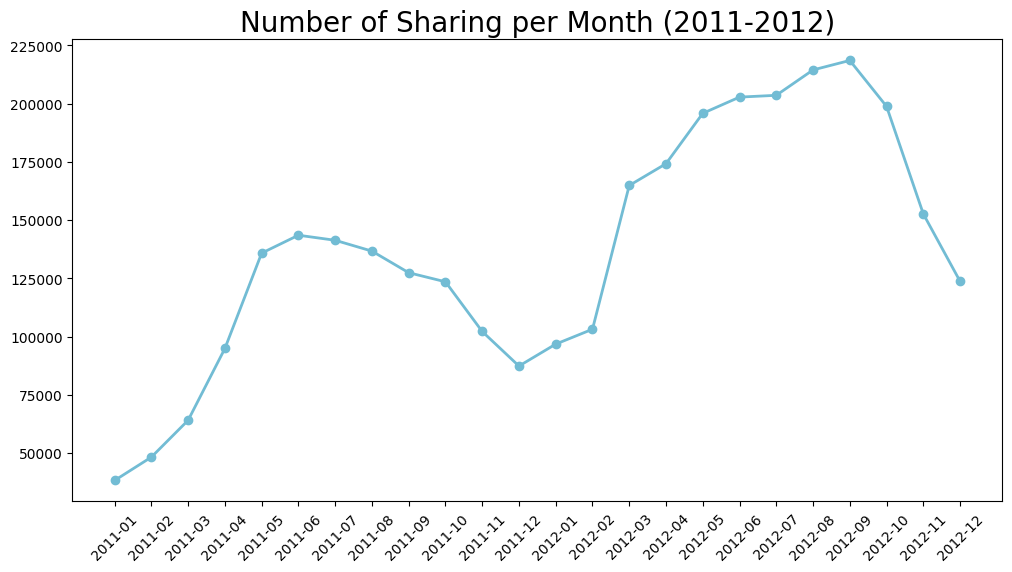

In [28]:
monthly_sharing = day_df.resample(rule='ME', on='dteday').agg({
    'cnt':"sum"
})

monthly_sharing.index=monthly_sharing.index.strftime('%Y-%m')
monthly_sharing=monthly_sharing.reset_index()
monthly_sharing.rename(columns={
    'cnt':'total_sharing'
}, inplace= True)

plt.figure(figsize=(12, 6)) 
plt.plot(monthly_sharing["dteday"], monthly_sharing['total_sharing'],marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Sharing per Month (2011-2012)", loc="center", fontsize=20) 
plt.xticks(fontsize=10, rotation=45) 
plt.yticks(fontsize=10) 
plt.show()

**insight**
Based on the visualization, the trend in the number of bike sharing in 2011-2012 have a similar pattern where at the beginning of the year to the middle of the year it will increase, then until the end of the year it will decrease. But, the monthly data shows some fluctuations indicating that while there is an overall trend of increasing bike sharing

### Pertanyaan 2 (highest bike sharing time):

Text(0, 0.5, 'Total Sharing')

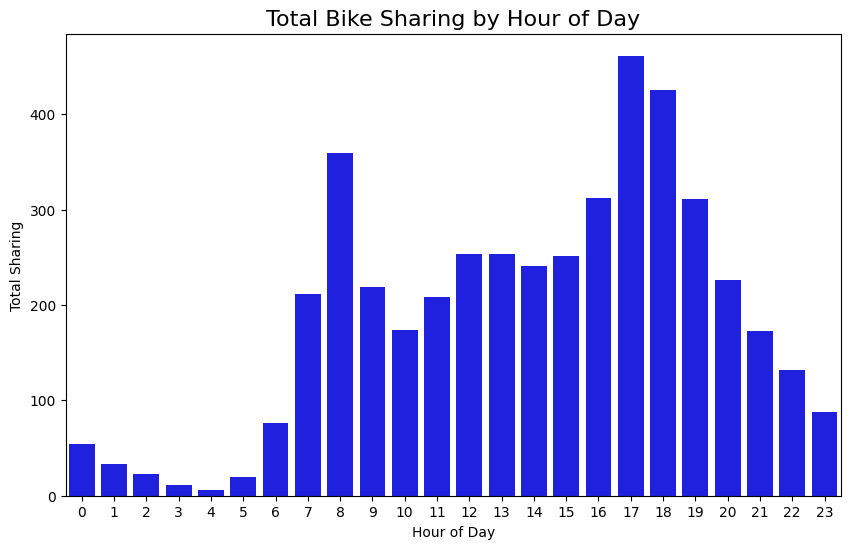

In [29]:
hourly_sharing = hour_df.groupby('hr')['cnt'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=hour_df, x='hr', y='cnt', color='blue', errorbar=None, ax=ax)
ax.set_title('Total Bike Sharing by Hour of Day', fontsize=16)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Total Sharing')


**insight**
the graphic visualize the pattern of bike sharing per hour.  There are significant fluctuations in the number of sharing throughout the day. The peak time is afternoon around 5pm.


### Pertanyaan 3 (Comparison between registered and casual bikers):


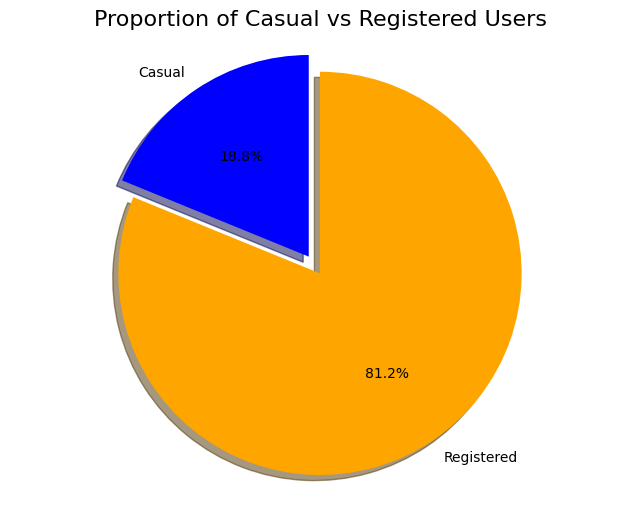

In [30]:
labels = ['Casual', 'Registered']
sizes = [day_df['casual'].sum(), day_df['registered'].sum()]
colors = ['blue', 'orange']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Proportion of Casual vs Registered Users', fontsize=16)
plt.axis('equal')
plt.show()


**Insight:**
the pie diagram shows comparison of the registered renters and casual on year of 2011-2012. From the diagram,the propotion of registered renters is bigger (81.2%) than the casual renters (18.8%) on 2011-2012.

## Analisis Lanjutan (Opsional)

**TREN**

From the monthly analysis,the bike sharing increase at the beginning to middle of the year. It might caused by seasonal factors such a great weather situation (Clear, few clouds), spring and fall season. That's also supported by the high of number sharing in these time. The decreasing in the end of the year is also might caused by the winter season. People commonly rare using bike because the temperature that really not support to use bicycle. From that, the habit of people in sharing bike is so depend on the environment condition.  

**PEAK HOUR**
The peak of sharing around 5pm may reflect the need of users to go home from work, refreshing, or social activities. In this case, bicycle sharing is such a great solution on their leisure time. 

**COMPARISON**
With 81.2% proportion for registered, this suggest that most people are more committed to the services, another option is that registered class may use bike more often. 

## Conclusion

- From the monthly analysis,the bike sharing increase at the beginning to middle of the year. It might caused by seasonal factors such a great weather situation (Clear, few clouds), spring and fall season. With the increasing of sharing in certain seasons, it is important to plan more aggressive marketing campaigns during this session. It also can be a promotions to encourage new users. The promotion might be offering new products or additional services, such as couple or family packages, discounts, or the amount and quality of the bike. 
- The peak of sharing around 5pm may reflect the need of users to go home from work, refreshing, or social activities. On the other side, the promotion for sharing bike in other hour is needed.
- With the 18.8% of casual users, there should be more improvements to make them being registered. It might be start from cllecting more data on casual and registered renter users can help in understanding their preferences and habits, which can be used to customize services and improve user experience.

In [31]:
hour_df.to_csv("main_data.csv", index=False)